<a href="https://colab.research.google.com/github/puritym8/Machine-Learning--1/blob/main/Week_2_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.pipeline import make_pipeline


In [17]:
df = pd.read_csv('/content/drive/MyDrive/abalone.data')
df.head(2)

,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
0,M,0.35,0.265,0.090,0.2255,0.0995,0.0485,0.07,7
1,F,0.53,0.420,0.135,0.6770,0.2565,0.1415,0.21,9


In [18]:
!pip install ucimlrepo


In [19]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
abalone = fetch_ucirepo(id=1)

# data (as pandas dataframes)
X = abalone.data.features
y = abalone.data.targets

print(X.shape, y.shape)

(4177, 8) (4177, 1)


In [20]:
df = pd.DataFrame(X, columns=abalone.feature_names)
df['progression'] = y ## Target variable
df.head(3)

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,progression
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.21,9


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   progression     4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [22]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
progression       0
dtype: int64

In [23]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole_weight      float64
Shucked_weight    float64
Viscera_weight    float64
Shell_weight      float64
progression         int64
dtype: object

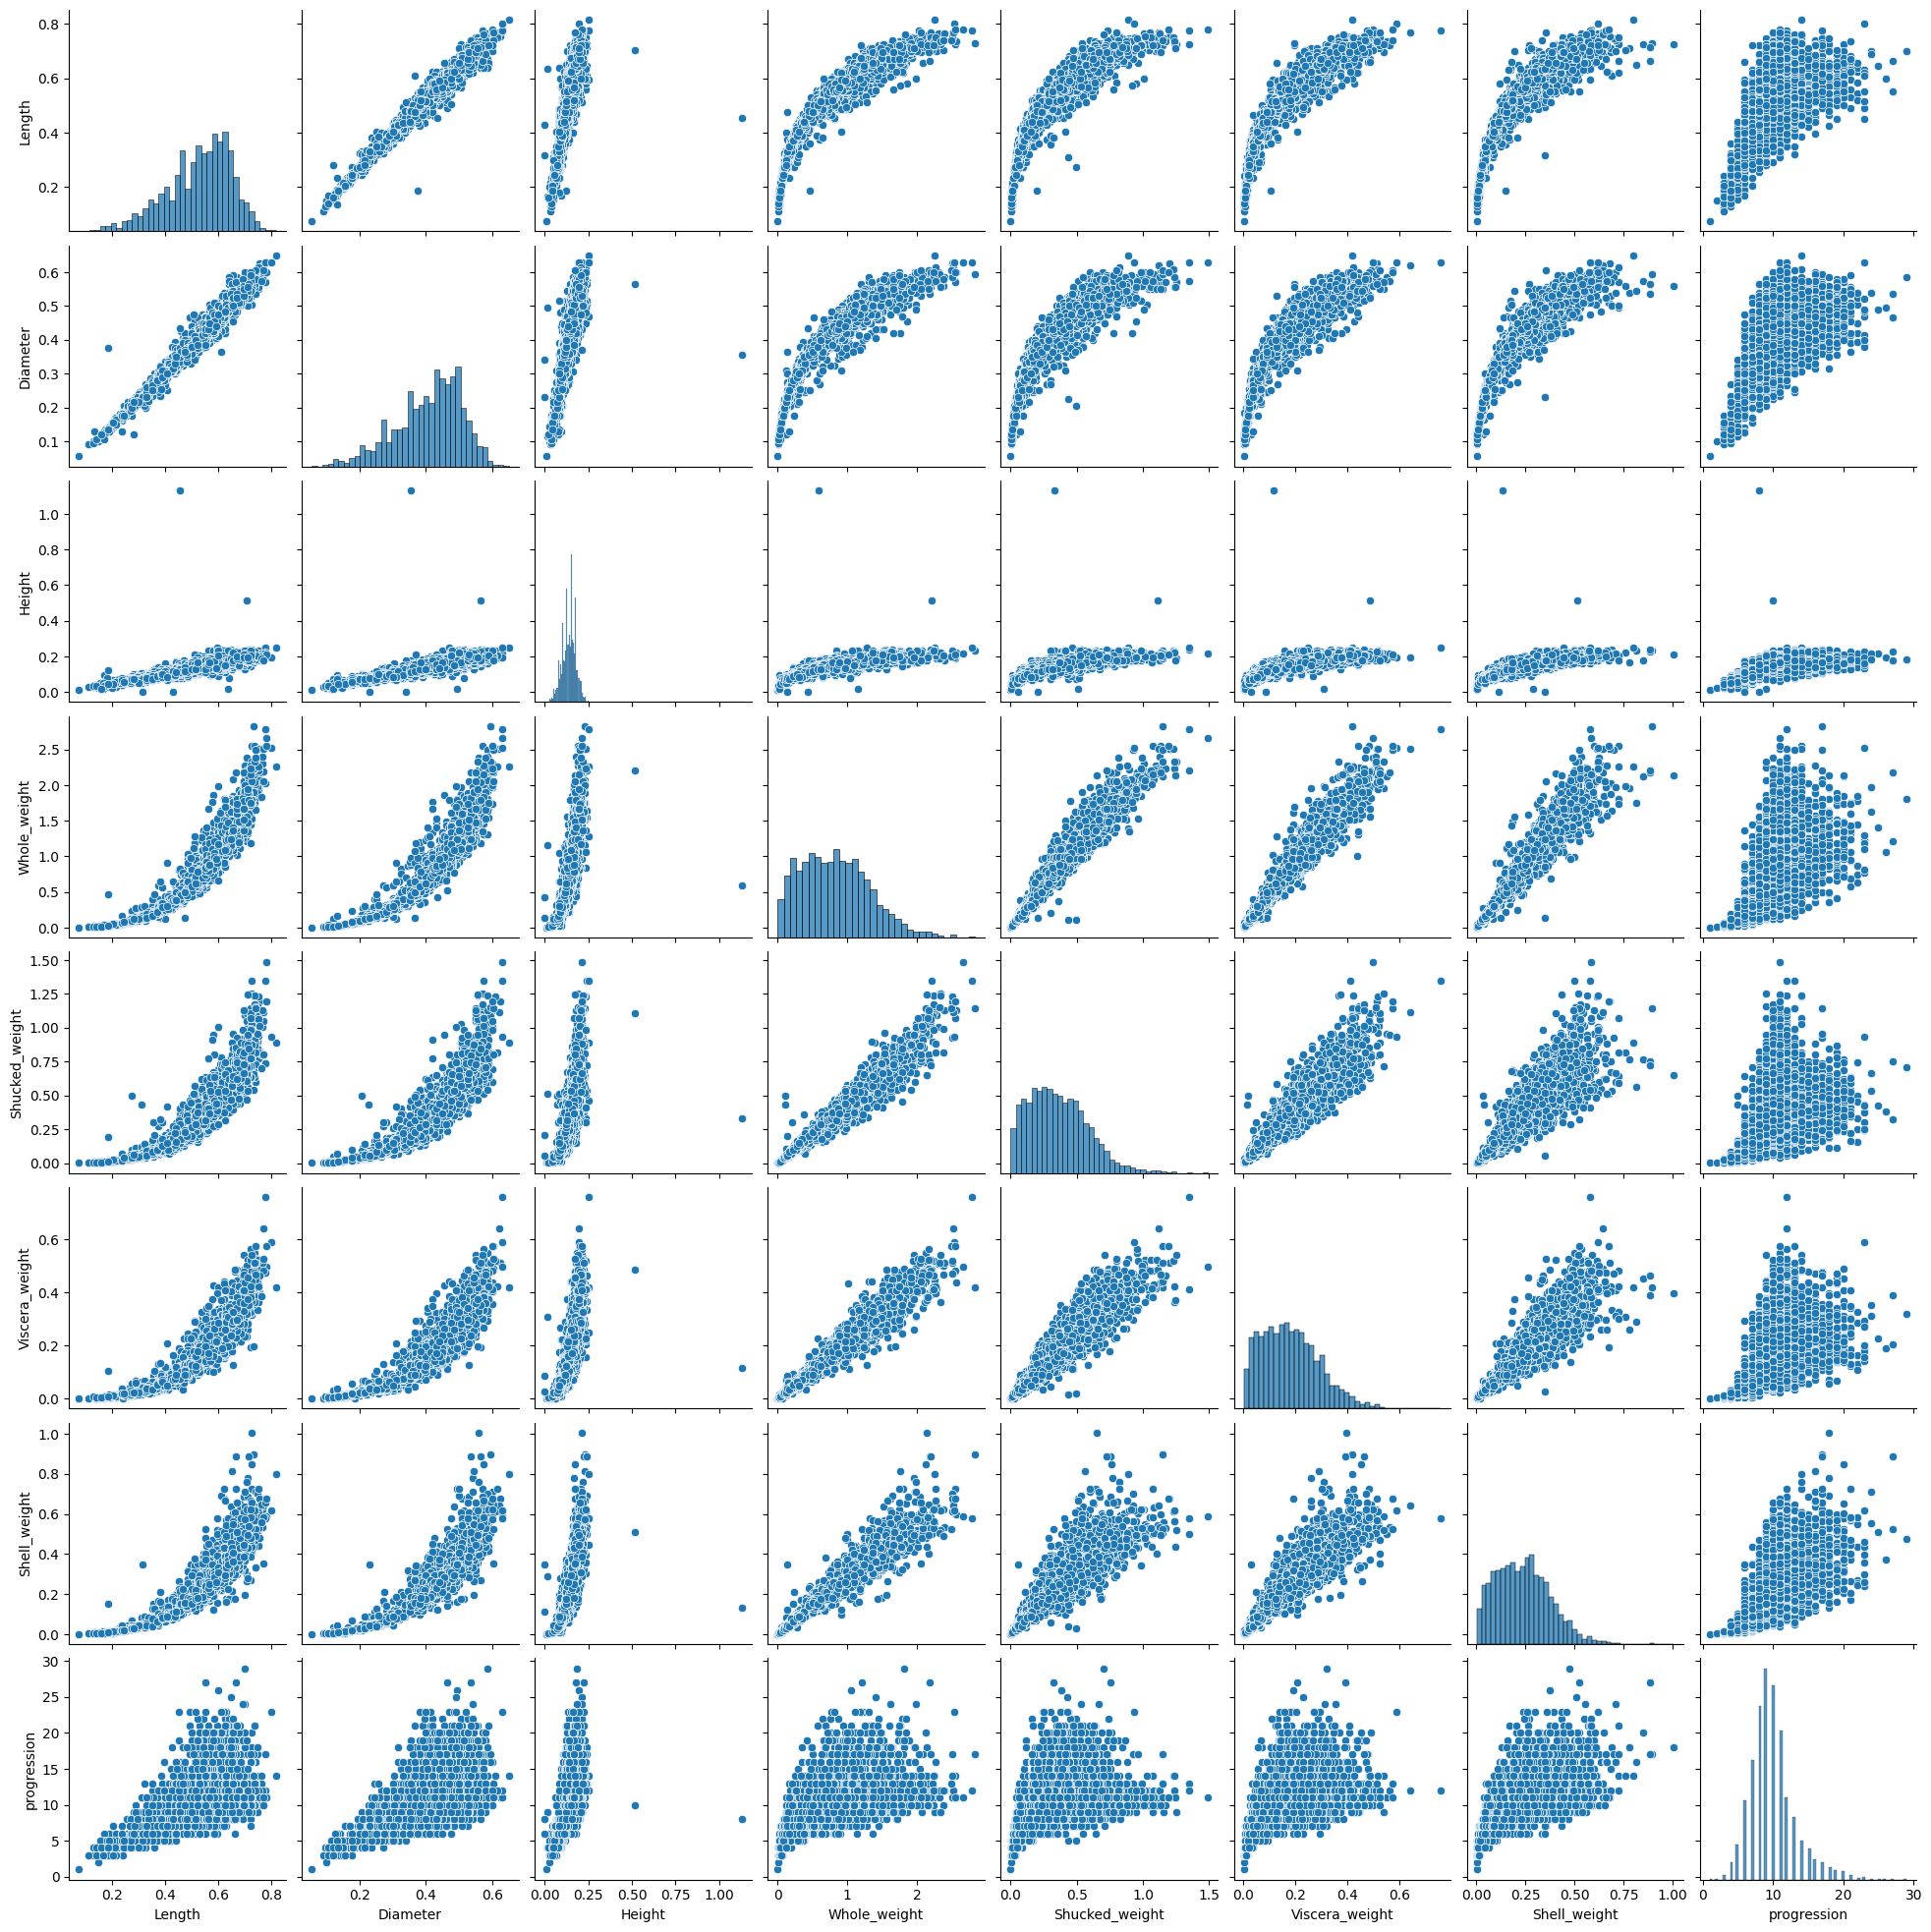

In [24]:
## Visualise the dataset with scatter plots
sns.pairplot(df)
plt.show()

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3341, 8) (836, 8) (3341, 1) (836, 1)


In [29]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Fit the LabelEncoder to the 'Sex' column
le.fit(X_train['Sex'])

# Transform the 'Sex' column in both X_train and X_test
X_train['Sex'] = le.transform(X_train['Sex'])
X_test['Sex'] = le.transform(X_test['Sex'])

# Fit the model
model = model.fit(X_train, y_train)

In [28]:
model = LinearRegression()
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(mse)

5.562270235060491


In [30]:
print('Coefficients: ', model.coef_) #Get the coefficients for all the features in the dataset
print('Y-Intercept: ', model.intercept_) #The intercept of the model or the constant in the regression equation

Coefficients:  [[ 2.01735342e-02 -1.04176024e+00  1.44172881e+01  1.05664128e+01
   9.24378738e+00 -2.09086318e+01 -9.33093791e+00  8.28755855e+00]]
Y-Intercept:  [2.62620047]


Day 2: Polynomial Regression


In [31]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression # Changed the import statement
from sklearn.pipeline import make_pipeline
import math
from sklearn.metrics import mean_squared_error, r2_score

In [32]:
model1 = make_pipeline(StandardScaler(),PolynomialFeatures(degree=2),LinearRegression())
model1 = model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)
print((mse),r2)

5.223575376847933 0.529067761927436


In [33]:
model1 = make_pipeline(StandardScaler(),PolynomialFeatures(degree=3),LinearRegression())
model1 = model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)
print((mse),r2)

5.7146327019928975 0.48479641357522907


In [34]:
model1 = make_pipeline(StandardScaler(),PolynomialFeatures(degree=1),LinearRegression())
model1 = model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)
print((mse),r2)

5.562270235060478 0.49853267511531607


In [37]:
from sklearn.preprocessing import FunctionTransformer


In [38]:
model2 = make_pipeline(FunctionTransformer(func=np.log),LinearRegression())
model2 = model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)
print(math.sqrt(mse),r2)

/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


ValueError: Input X contains infinity or a value too large for dtype('float64').

Day 3 - Regularisation


In [41]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet


In [39]:
model = make_pipeline(StandardScaler(),LinearRegression())
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)
print(math.sqrt(mse),r2)

2.358446572441377 0.49853267511531607


In [42]:
model = make_pipeline(StandardScaler(),Ridge(alpha=19))
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)
print(math.sqrt(mse),r2)

2.3615074945089325 0.497230166513428


In [43]:
model = make_pipeline(StandardScaler(),Lasso(alpha=3))
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)
print(math.sqrt(mse),r2)

3.3411375798230476 -0.006420035114494516


In [44]:
model = make_pipeline(StandardScaler(),ElasticNet(alpha=1.5,l1_ratio=0.6))
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)
print(math.sqrt(mse),r2)

2.894723869587514 0.2445515403413535


In [45]:
model1 = make_pipeline(StandardScaler(),PolynomialFeatures(degree=2),Ridge(alpha=10))
model1 = model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)
print(math.sqrt(mse),r2)

2.2915260024490327 0.5265870488520843
